<a href="https://colab.research.google.com/github/vmcarranzam/labsl1/blob/main/Examen_Parcial_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. ¿Qué es Machine Learning?

Es un conjunto de técnicas basadas en algoritmos que crean modelos de forma iterativa a partir de sets de datos para  permitirle a las computadoras "aprender" y predecir resultados, sin programar de forma explícita dichos modelos.

#2. Liste los tipos de aprendizaje de máquina


Supervisado y No supervisado

#3. ¿Cuál es la diferencia entre AI y ML?


La Inteligencia Artificial es una rama amplia de las ciencias de la computación  que abarca las técnicas utilizadas para dotar de inteligencia a una computadora, emulando procesos cognitivos. Machine Learning es una sub-rama de la Inteligencia artificial, por lo que abarca solo un sub-grupo de las áreas de interés de la misma, particularmente los algoritmos para que una computadora pueda "aprender" basándose en datos.

#4.  Describa brevemente como se realiza un modelo de predicción para ML


1. Se realiza exploración de datos para entender mejor las variables y entradas que contienen el o los datasets a utilizar.
2. Se determina el tipo de modelo a utilizar y las métricas de validación correspondiente, según lo que se busca con el mismo.
3. Se elige la forma de separación del dataset en sub-sets de entrenamiento y sub-sets de validación (Kfold, división porcentual aleatoria, etc)
4. Se entrena el modelo con los datos elegidos para entrenamiento.
5. Se realizan pruebas de validación del modelo con el o los sub-sets de validación.
6. Se decide, según las métricas determinadas, si el modelo es preciso, si está sobre ajustado o si no es útil.

#5. Describa dos algoritmos de ML y dos de sus aplicaciones.


Regresión Lineal: algoritmo que utiliza las entradas de una o más variables independientes para calcular los coeficientes (pendiente e intercepto) de una recta que se aproxima a la distribución de datos utilizada para el entrenamiento. Es útil para predicción de valores continuos como precios de casas ó precios de acciones.

Clustering: algoritmo que separa las entradas de las variables independientes en grupos o clusters según sus similitudes. Puede ser útil para realizar segmentaciones óptimas de audiencias en campañas de marketing y categorización de clientes para sistemas de sugerencias.

#6. ¿Cómo se calcula los
𝜃s en una regresión lineal?


Se calculan utilizando el algoritmo de gradiente decreciente, que itera para determinar los coeficientes para la recta que minimizan el error en la predicción del modelo.

#7. ¿Qué es "ACCURACY" en un modelo de ML?


Es una métrica usada para medir el rendimiento de un modelo de aprendizaje de máquina. Consiste en el cálculo de la proporción de predicciones correctas realizadas por el modelo en el grupo de datos utilizados para validar.

#8. ¿Cómo funciona K-FOLD CROSS VALIDATION?


La  técnica de validación cruzada de K-pliegues o grupos consiste en dividir el dataset empleado en K grupos de datos de tamaños aproximadamente iguales, para luego utilizar uno de ellos por iteración como el grupo de datos de validación, mientras todo el resto es utilizado para entrenar al modelo. La parte de validación consiste en comparar las métricas de rendimiento de los K-modelos  entrenados y elegir aquel que tenga las mejores.

#9. ¿Cómo se determina si el problema es lineal o no lineal en algoritmos de ML?


Se determina la linealidad de un problema analizando la relación entre las variables independientes y la dependiente. Si es posible trazar una línea recta que modele de forma precisa el comportamiento de los datos del problema, se trata de un modelo lineal, de lo contrario, si se requiere de otro tipo de función no lineal para modelar el comportamiento, se trata de un modelo no lineal.

#10. ¿Cómo se selecciona el "K" correcto para el algoritmo K-Nearest?


Puede seleccionarse de forma heurística, empezando desde un valor bajo, aumentándolo iterativamente y observar el cambio en el rendimiento del modelo obtenido.

También es usual que se seleccione calculando la raíz cuadrada del número de muestras o datos utilizados para el entrenamiento.

#11. Usted esta interpretando el resultado de un algoritmo de ML que categoriza pacientes de enfermedades terminales, la matriz de confusión devolvio el valor TP con 8 y FN con 15, ¿qué podría concluir del modelo?


El modelo predice correctamente solamente un aproximado de 1/3 de las ocasiones mientras que lo hace de forma errónea (falsos negativos) 2/3 de las veces. Tratándose de enfermedades terminales, el modelo es poco confiable para ser considerado útil.

#12. Usted esta interpretando un modelo de ML que tiene un F1-SCORE de 1, ¿qué podria concluir del modelo?


Que el modelo está sobreajustado o que se utilizaron los datos de entrenamiento como datos de validación.

#13. ¿Utilizaría un Decision Tree para obtener un resultado predictivo y asi clasificar a la variable dependiente? Justifique su respuesta.


Si, el algoritmo de árbol de decisión es útil tanto para clasificación como para regresión. Es sencillo de comprender e interpretar debido a que tiene parecido con el flujo de toma de decisiones lógicas cotidianas y puede ser utilizado con variables categóricas y numéricas.

#14. Explique los indicadores obtenidos de la matriz de confusión.

* TP: Verdaderos positivos, representa el número de datos correctamente clasificados como verdaderos.

* TN: Verdaderos negativos, representa el número de datos correctamente clasificados como falsos.

* FP: Falsos positivos, error tipo I, representa el número de datos incorrectamente clasificados como positivos.

* FN: Falsos negativos, error tipo II, representa el número de datos incorrectamente clasificados como negativos.

* Accuracy: precisión del modelo al realizar predicciones, (TP + TN) / (TP + TN + FP + FN)

* Recall o Sensibilidad: capacidad del modelo para detectar o clasificar correctamente positivos, TP / (TP + FN)

* Especificidad: capacidad del modelopara detectar o clasificar correctamente negativos, TN / (TN + FP)

* F1 Score: combinación de precisión y sensibilidad en una sola métrica, 2 * (Precision * Recall) / (Precision + Recall)

#Ejercicio 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
%matplotlib inline

In [4]:
df = pd.read_csv("dataset_31_credit-g_2_.csv")
df.sample(10)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
573,'<0',15,'existing paid',business,806,'<100','1<=X<4',4,'female div/dep/mar',none,...,'life insurance',22,none,own,1,'unskilled resident',1,none,yes,good
576,'0<=X<200',12,'existing paid',radio/tv,2930,'<100','4<=X<7',2,'female div/dep/mar',none,...,'real estate',27,none,own,1,skilled,1,none,yes,good
255,'0<=X<200',60,'delayed previously',radio/tv,7418,'no known savings','1<=X<4',1,'male single',none,...,'real estate',27,none,own,1,'unskilled resident',1,none,yes,good
186,'0<=X<200',9,'all paid','used car',5129,'<100','>=7',2,'female div/dep/mar',none,...,'no known property',74,bank,'for free',1,'high qualif/self emp/mgmt',2,yes,yes,bad
465,'<0',24,'existing paid','used car',2924,'<100','1<=X<4',3,'male single',guarantor,...,'no known property',63,bank,own,1,skilled,2,yes,yes,good
804,'0<=X<200',12,'existing paid','new car',7472,'no known savings',unemployed,1,'female div/dep/mar',none,...,'real estate',24,none,rent,1,'unemp/unskilled non res',1,none,yes,good
193,'no checking',6,'existing paid',radio/tv,2108,'<100','4<=X<7',2,'male mar/wid',none,...,'real estate',29,none,rent,1,skilled,1,none,yes,good
258,'no checking',15,'existing paid','used car',3812,'100<=X<500','<1',1,'female div/dep/mar',none,...,car,23,none,own,1,skilled,1,yes,yes,good
633,'no checking',9,'existing paid',furniture/equipment,1980,'<100','<1',2,'female div/dep/mar','co applicant',...,car,19,none,rent,2,skilled,1,none,yes,bad
567,'no checking',24,'critical/other existing credit',radio/tv,2578,'>=1000','>=7',2,'male single',none,...,car,34,none,own,1,skilled,1,none,yes,good


Conteo de cada valor diferente en las columnas categóricas:

In [19]:
for columna in df.columns:
  if df[columna].dtypes == 'object':
    print(df[columna].value_counts())

'no checking'    394
'<0'             274
'0<=X<200'       269
'>=200'           63
Name: checking_status, dtype: int64
'existing paid'                     530
'critical/other existing credit'    293
'delayed previously'                 88
'all paid'                           49
'no credits/all paid'                40
Name: credit_history, dtype: int64
radio/tv                280
'new car'               234
furniture/equipment     181
'used car'              103
business                 97
education                50
repairs                  22
'domestic appliance'     12
other                    12
retraining                9
Name: purpose, dtype: int64
'<100'                603
'no known savings'    183
'100<=X<500'          103
'500<=X<1000'          63
'>=1000'               48
Name: savings_status, dtype: int64
'1<=X<4'      339
'>=7'         253
'4<=X<7'      174
'<1'          172
unemployed     62
Name: employment, dtype: int64
'male single'           548
'female div/dep/mar'   

Sustituyendo las columnas categóricas con sus equivalentes numéricas

In [24]:
for columna in df.columns:
  if df[columna].dtypes == 'object':
    df[columna] = pd.Categorical(df[columna])
    df[str(columna + "_num")] = df[columna].cat.codes
    df.drop(columna, axis=1, inplace=True)
df.drop('class', axis=1, inplace=True)
df

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,class_num,checking_status_num,credit_history_num,...,savings_status_num,employment_num,personal_status_num,other_parties_num,property_magnitude_num,other_payment_plans_num,housing_num,job_num,own_telephone_num,foreign_worker_num
0,6,1169,4,4,67,2,1,1,1,1,...,4,3,3,2,2,1,1,3,1,1
1,48,5951,2,2,22,1,1,0,0,3,...,2,0,0,2,2,1,1,3,0,1
2,12,2096,2,3,49,1,2,1,3,1,...,2,1,3,2,2,1,1,2,0,1
3,42,7882,2,4,45,1,2,1,1,3,...,2,1,3,1,0,1,0,3,0,1
4,24,4870,3,4,53,2,2,0,1,2,...,2,0,3,2,1,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,12,1736,3,4,31,1,1,1,3,3,...,2,1,0,2,2,1,1,2,0,1
996,30,3857,4,4,40,1,1,1,1,3,...,2,0,1,2,0,1,1,0,1,1
997,12,804,4,4,38,1,1,1,3,3,...,2,3,3,2,3,1,1,3,0,1
998,45,1845,4,4,23,1,1,0,1,3,...,2,0,3,2,1,1,0,3,1,1


Descartando filas con valores no numéricos y describiendo el dataset resultante

In [28]:
df.dropna(inplace=True)
df.describe()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,class_num,checking_status_num,credit_history_num,...,savings_status_num,employment_num,personal_status_num,other_parties_num,property_magnitude_num,other_payment_plans_num,housing_num,job_num,own_telephone_num,foreign_worker_num
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,0.700000,1.582000,2.219000,...,2.1450,1.525000,1.878000,1.866000,1.714000,0.908000,1.071000,2.312000,0.404000,0.963000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487,1.253334,1.064035,...,1.1114,1.344315,1.350904,0.445244,1.154789,0.421561,0.531264,1.071356,0.490943,0.188856
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,0.000000,0.000000,1.000000,...,2.0000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,2.000000,0.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000,1.000000,3.000000,...,2.0000,1.000000,3.000000,2.000000,2.000000,1.000000,1.000000,3.000000,0.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,1.000000,3.000000,3.000000,...,2.0000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,3.000000,1.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,1.000000,3.000000,4.000000,...,4.0000,4.000000,3.000000,2.000000,3.000000,2.000000,2.000000,3.000000,1.000000,1.000000


Estandarizando valores numéricos

In [30]:
dfnorm = df
numerical_columns = dfnorm.select_dtypes(include=['float64', 'int64']).columns
dfnorm[numerical_columns] = StandardScaler().fit_transform(dfnorm[numerical_columns])
dfnorm

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,class_num,checking_status_num,credit_history_num,...,savings_status_num,employment_num,personal_status_num,other_parties_num,property_magnitude_num,other_payment_plans_num,housing_num,job_num,own_telephone_num,foreign_worker_num
0,-1.236478,-0.745131,0.918477,1.046987,2.766456,1.027079,-0.428290,1,1,1,...,4,3,3,2,2,1,1,3,1,1
1,2.248194,0.949817,-0.870183,-0.765977,-1.191404,-0.704926,-0.428290,0,0,3,...,2,0,0,2,2,1,1,3,0,1
2,-0.738668,-0.416562,-0.870183,0.140505,1.183312,-0.704926,2.334869,1,3,1,...,2,1,3,2,2,1,1,2,0,1
3,1.750384,1.634247,-0.870183,1.046987,0.831502,-0.704926,2.334869,1,1,3,...,2,1,3,1,0,1,0,3,0,1
4,0.256953,0.566664,0.024147,1.046987,1.535122,1.027079,2.334869,0,1,2,...,2,0,3,2,1,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.738668,-0.544162,0.024147,1.046987,-0.399832,-0.704926,-0.428290,1,3,3,...,2,1,0,2,2,1,1,2,0,1
996,0.754763,0.207612,0.918477,1.046987,0.391740,-0.704926,-0.428290,1,1,3,...,2,0,1,2,0,1,1,0,1,1
997,-0.738668,-0.874503,0.918477,1.046987,0.215835,-0.704926,-0.428290,1,3,3,...,2,3,3,2,3,1,1,3,0,1
998,1.999289,-0.505528,0.918477,1.046987,-1.103451,-0.704926,-0.428290,0,1,3,...,2,0,3,2,1,1,0,3,1,1


<Axes: >

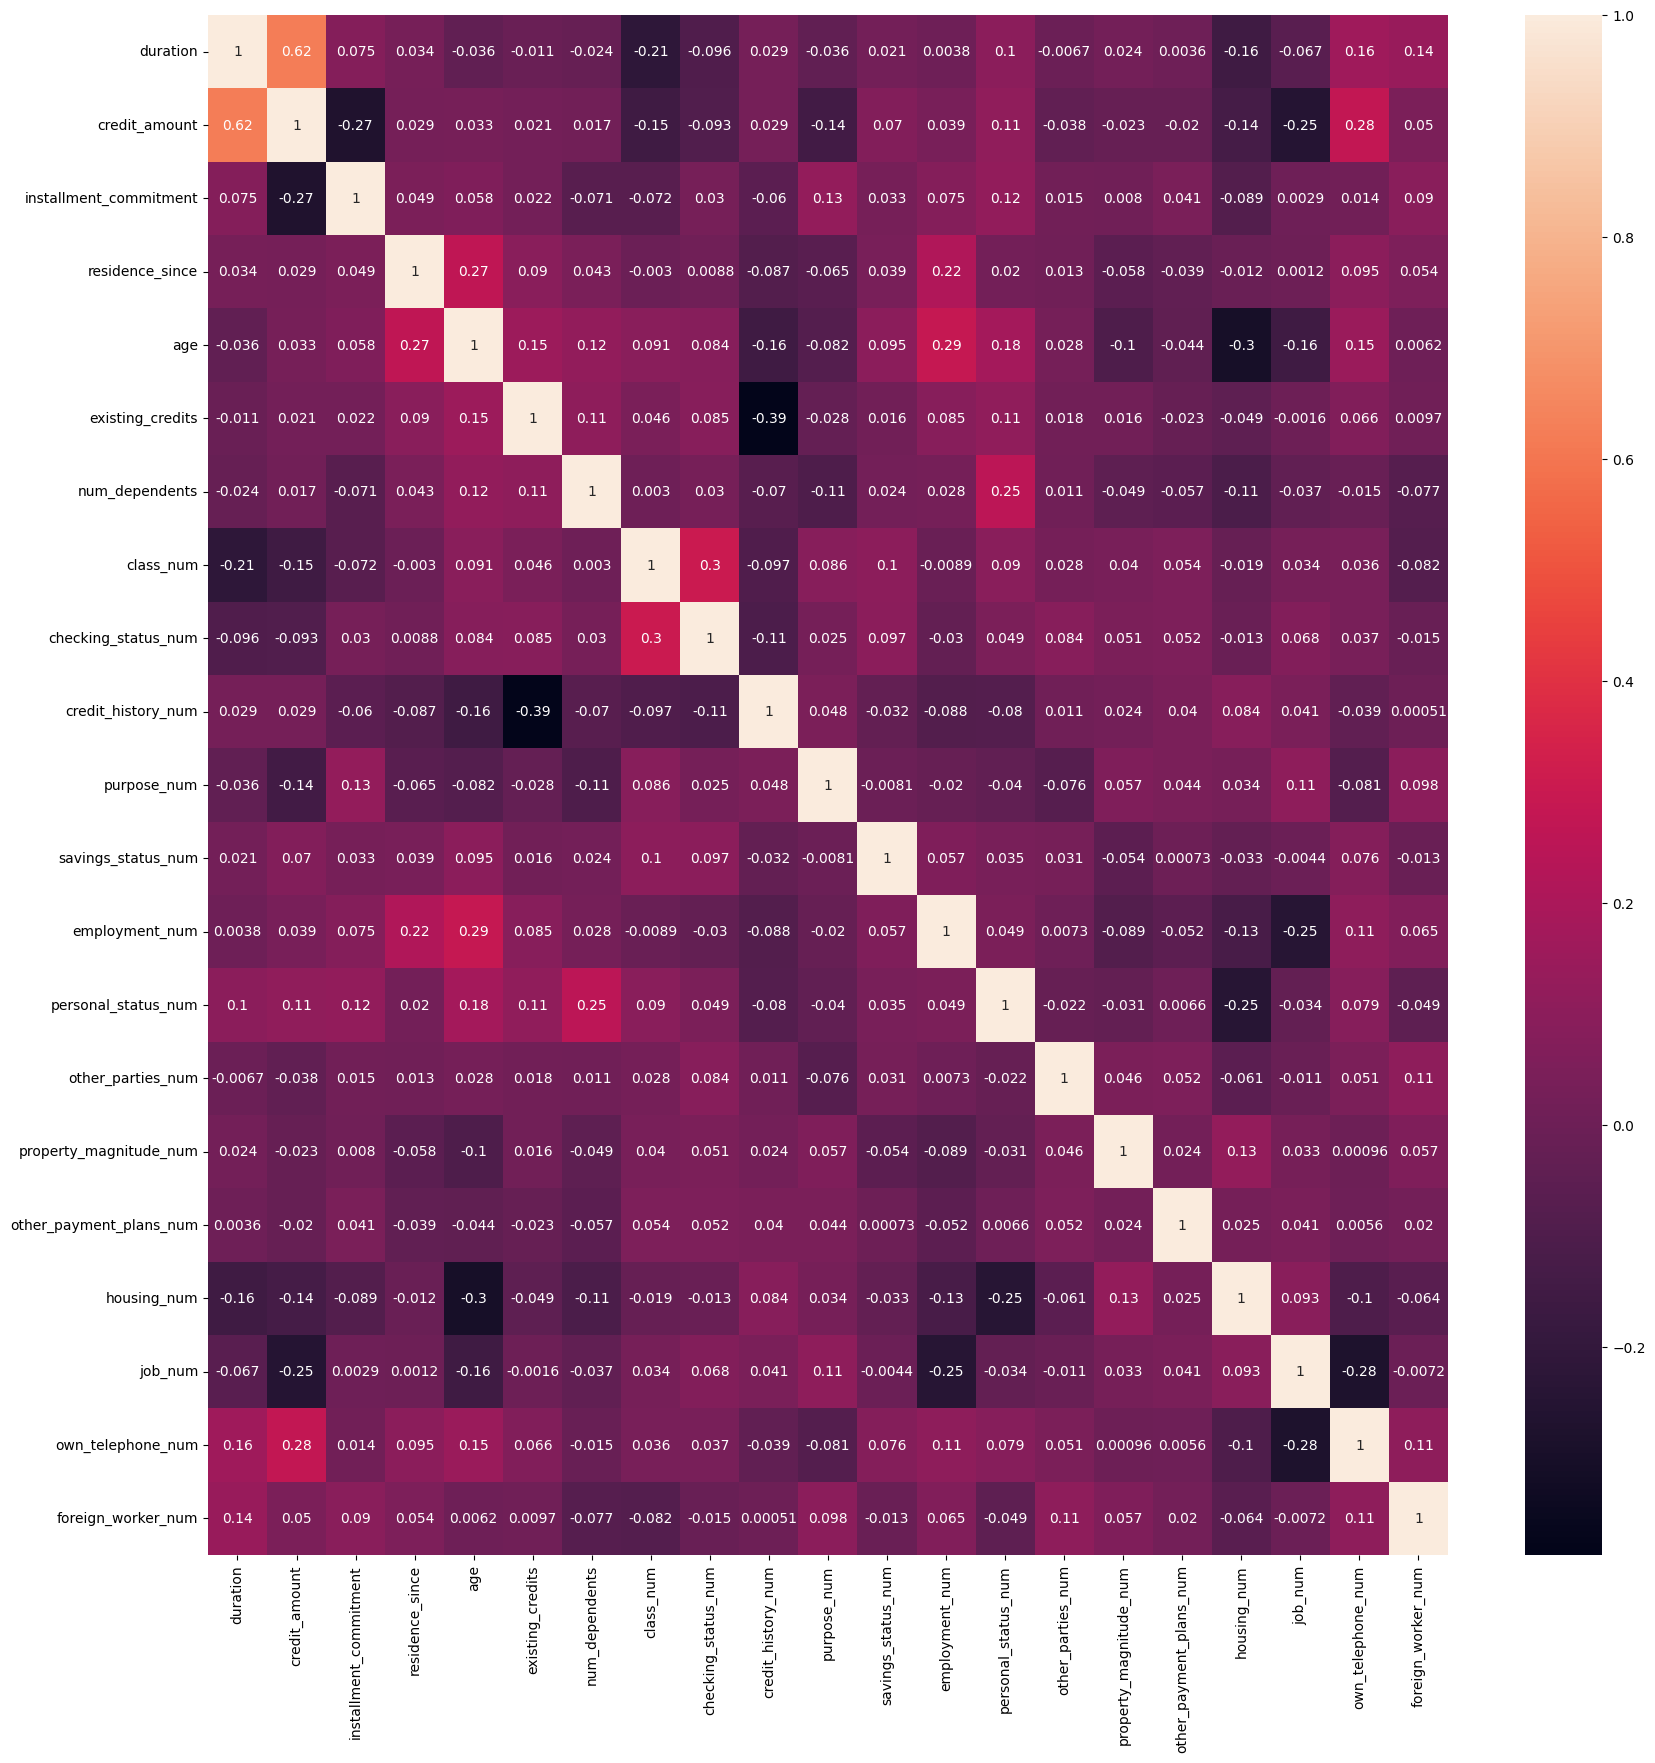

In [69]:
plt.figure(figsize = (20,20))
sns.heatmap(dfnorm.corr(), annot= True, color = 'red')

Asignación de descriptores y objetivo para el modelo a utilizar

In [33]:
dfnorm.columns

Index(['duration', 'credit_amount', 'installment_commitment',
       'residence_since', 'age', 'existing_credits', 'num_dependents',
       'class_num', 'checking_status_num', 'credit_history_num', 'purpose_num',
       'savings_status_num', 'employment_num', 'personal_status_num',
       'other_parties_num', 'property_magnitude_num',
       'other_payment_plans_num', 'housing_num', 'job_num',
       'own_telephone_num', 'foreign_worker_num'],
      dtype='object')

In [34]:
X = dfnorm[['duration', 'credit_amount', 'installment_commitment',
       'residence_since', 'age', 'existing_credits', 'num_dependents',
       'checking_status_num', 'credit_history_num', 'purpose_num',
       'savings_status_num', 'employment_num', 'personal_status_num',
       'other_parties_num', 'property_magnitude_num',
       'other_payment_plans_num', 'housing_num', 'job_num',
       'own_telephone_num', 'foreign_worker_num']].values
X[0:5]

array([[-1.23647786, -0.74513141,  0.91847717,  1.04698668,  2.76645648,
         1.02707891, -0.42828957,  1.        ,  1.        ,  7.        ,
         4.        ,  3.        ,  3.        ,  2.        ,  2.        ,
         1.        ,  1.        ,  3.        ,  1.        ,  1.        ],
       [ 2.24819436,  0.94981679, -0.87018333, -0.76597727, -1.19140394,
        -0.704926  , -0.42828957,  0.        ,  3.        ,  7.        ,
         2.        ,  0.        ,  0.        ,  2.        ,  2.        ,
         1.        ,  1.        ,  3.        ,  0.        ,  1.        ],
       [-0.73866754, -0.41656241, -0.87018333,  0.14050471,  1.18331231,
        -0.704926  ,  2.33486893,  3.        ,  1.        ,  4.        ,
         2.        ,  1.        ,  3.        ,  2.        ,  2.        ,
         1.        ,  1.        ,  2.        ,  0.        ,  1.        ],
       [ 1.75038404,  1.63424694, -0.87018333,  1.04698668,  0.8315025 ,
        -0.704926  ,  2.33486893,  1.        ,  

In [35]:
y = dfnorm['class_num'].values
y[0:5]

array([1, 0, 1, 1, 0], dtype=int8)

División del dataset

In [36]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=33)

Se decide utilizar el modelo K-Nearest Neighbors, puesto que es efectivo para tareas de clasificación con valores continuos.

Debido al conocimiento que se tiene sobre el Dataset, se sabe que son 2 categorías en las que deben clasificarse los datos, por lo que se elige k=2

In [37]:
k = 2
knnmod = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
knnmod

KNeighborsClassifier(n_neighbors=2)

Una vez entrenado el modelo, se procede a realizar predicciones y a obtener puntajes de validación.

In [38]:
yhat = knnmod.predict(X_test)
yhat[0:200]

array([0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0], dtype=int8)

In [39]:
print("Certeza en entrenamiento: ", metrics.accuracy_score(y_train, knnmod.predict(X_train)))
print("Certeza en validación: ", metrics.accuracy_score(y_test, yhat))

Certeza en entrenamiento:  0.8375
Certeza en validación:  0.6


Accuracy obtenido en la validación es bueno, pero puede mejorar, se reduce la cantidad de descriptores y se reentrena el modelo

In [ ]:
Xalt = dfnorm[['checking_status_num', 'duration',  'credit_amount','age','credit_history_num', 'savings_status_num']].values


In [110]:
Xalt = dfnorm[['checking_status_num', 'credit_amount','credit_history_num']].values
Xalt_train, Xalt_test, y_train, y_test = train_test_split( Xalt, y, test_size=0.4, random_state=4)

In [111]:
knnmodalt = KNeighborsClassifier(n_neighbors = k).fit(Xalt_train,y_train)
knnmodalt

KNeighborsClassifier(n_neighbors=2)

In [112]:
yhatalt = knnmodalt.predict(Xalt_test)

In [113]:
print("Certeza en entrenamiento: ", metrics.accuracy_score(y_train, knnmodalt.predict(Xalt_train)))
print("Certeza en validación: ", metrics.accuracy_score(y_test, yhatalt))

Certeza en entrenamiento:  0.8083333333333333
Certeza en validación:  0.6375


Reduciendo estratégicamente los descriptores del modelo, se obtiene un mejor puntaje de accuracy

##EJERCICIO 2

Según el resultado obtenido en el ejercicio anterior, la variable de mayor significancia para obtener una clasificación de "good" es "checking_status"